#Entity extraction script
---
Use this colab to extract all the person's names and locations

https://huggingface.co/dslim/bert-base-NER

#Add a Data folder and upload the Password.txt file in this folder

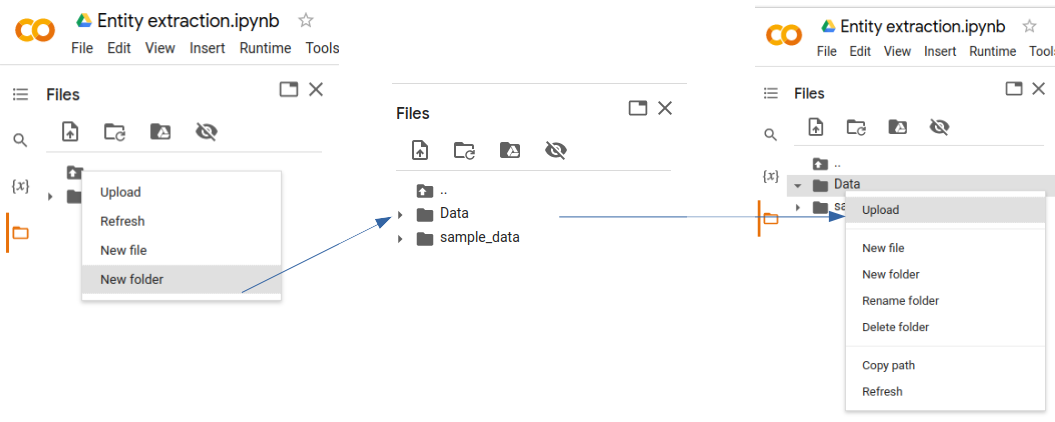

In [ ]:
#Install transformers library
!pip install transformers

In [ ]:
#Read file and store content
f = open("file.txt", "r")
content = f.read()
lines = content.split('\n')
print(lines)

In [ ]:
#Parameters to store extracted names and locations
names = []
locations=[]

In [ ]:
#import model and extract entities for each line
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

count=0
for line in lines:
  if count % 100 == 0:
    print(count, '/', len(lines), ' processed')
  count+=1
  ner_results = nlp(line)
  for key in ner_results:
    if key['entity'] == 'B-PER':
      names.append(key['word'])
    if key['entity'] == "B-LOC":
      locations.append(key['word'])
print("Extraction complete")

In [ ]:
#get only unique values
import numpy as np

unique_names = np.unique(names)
print("NAMES\n", len(unique_names), '\n', unique_names)

unique_locations = np.unique(locations)
print("LOCATIONS\n", len(unique_locations), '\n', unique_locations)
